In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
filename = 'covid19-es-and.csv'
fecha = '01/04/2020'
url = 'https://www.juntadeandalucia.es/organismos/saludyfamilias/actualidad/noticias/detalle/234014.html'

In [4]:
# Load 
tables = pd.read_html(url, header=0, index_col='Provincia', thousands='.')
assert len(tables) > 0
dfL = tables[0]
dfL

,Positivo,Casos que han precisado hospitalización,Casos que han precisado ingreso UCI,Fallecimientos,Curados
Provincia,,,,,
Almería,262,124,18,17,14
Cádiz,645,266,22,17,17
Córdoba,687,302,19,21,4
Granada,1182,603,56,80,15
Huelva,195,106,7,4,2
Jaén,742,395,16,37,17
Málaga,1464,815,65,77,93
Sevilla,1215,536,57,55,20
Total,6392,3147,260,308,182


In [5]:
# Prepare
provincias = ['Almería', 'Cádiz', 'Córdoba', 'Granada', 'Huelva', 'Jaén', 'Málaga', 'Sevilla', 'Total']
dfP = pd.DataFrame(0, index=provincias, columns=['Ingresados','Altas', 'Bajas'])

dfP['Ingresados'] = dfL['Casos que han precisado hospitalización']
dfP['Altas'] = dfL['Curados']
dfP['Bajas'] = dfL['Fallecimientos']
dfP['Fecha'] = fecha

dfP

,Ingresados,Altas,Bajas,Fecha
Almería,124,14,17,01/04/2020
Cádiz,266,17,17,01/04/2020
Córdoba,302,4,21,01/04/2020
Granada,603,15,80,01/04/2020
Huelva,106,2,4,01/04/2020
Jaén,395,17,37,01/04/2020
Málaga,815,93,77,01/04/2020
Sevilla,536,20,55,01/04/2020
Total,3147,182,308,01/04/2020


In [6]:
# Save to csv
dfP.to_csv(filename, encoding='utf-8', header=False, mode='+a', index_label='Provincia')

In [7]:
# Load full csv
dfCSV = pd.read_csv(filename, index_col='Provincia', thousands='.')

In [8]:
# Select & calc
title = 'COVID19 Andalucía'
total = dfCSV.loc['Total']['Ingresados'].pct_change() * 100
huelva = dfCSV.loc['Huelva']['Ingresados'].pct_change() * 100
malaga  = dfCSV.loc['Málaga']['Ingresados'].pct_change() * 100
# x Axis
xA = dfCSV.loc['Total']['Fecha']

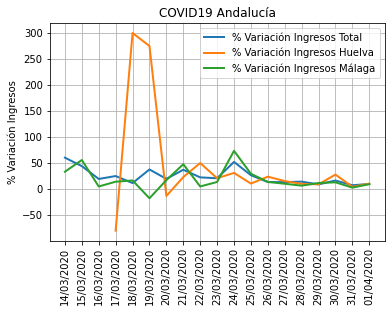

In [9]:
# Draw 
plt.plot(xA, total, label='% Variación Ingresos Total', linewidth=2)
plt.plot(xA, huelva, label='% Variación Ingresos Huelva', linewidth=2)
plt.plot(xA, malaga, label='% Variación Ingresos Málaga', linewidth=2)
plt.title(title)
plt.ylabel('% Variación Ingresos')
plt.xticks(rotation=90)
plt.grid(True)
plt.legend()
plt.show()

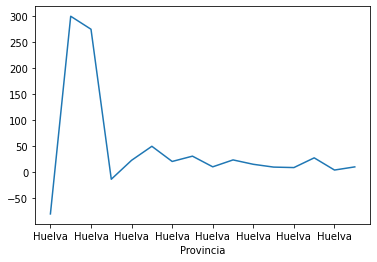

In [11]:
huelva.plot()